<a href="https://colab.research.google.com/github/Candongo-Dev/neuralnetwork.ipynb/blob/main/neuralnetwork.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
plt.style.use('dark_background')
plt.rcParams['figure.figsize'] = (10,8)

Create the dataset

In [3]:
def get_linear_curve(x, w, b=0, noise_scale=0):
  return w*x + b + noise_scale*np.random.randn(x.shape[0])

In [4]:
x = np.arange(-10, 30.1, 0.5)
Y = get_linear_curve(x, 1.8, 32, noise_scale=2.5)

In [5]:
x.shape, Y.shape

((81,), (81,))

Text(0, 0.5, '°F')

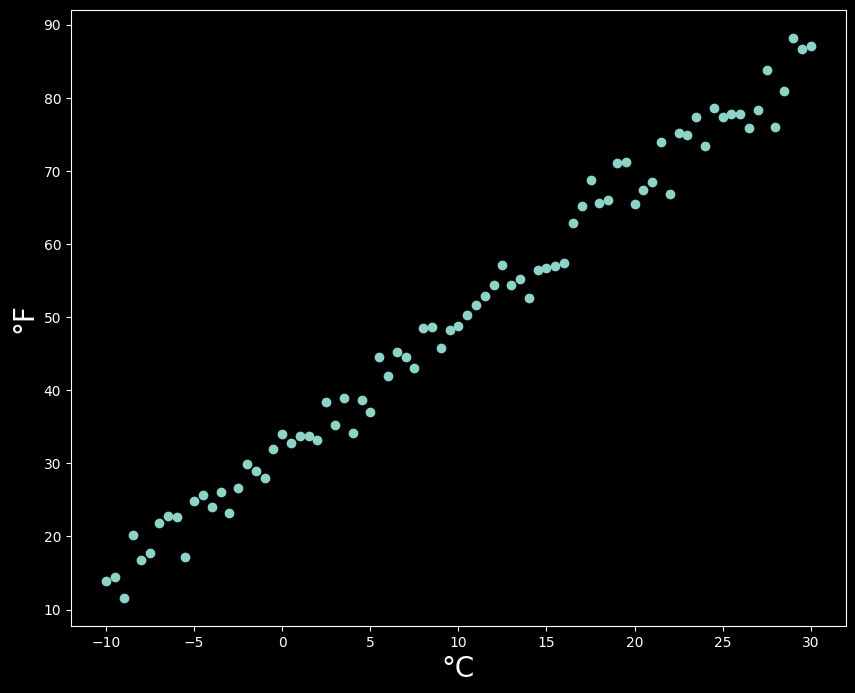

In [6]:
plt.scatter(x, Y)
plt.xlabel('°C', fontsize=20)
plt.ylabel('°F', fontsize=20)

Model

- Initialize the weights and bias
- Feedforward
- Calculate loss
- Backpropagation

In [7]:
# Initialize

w = np.random.rand(1)
b = 0

In [8]:
def forward(inputs, w, b):
  return w*inputs + b

In [9]:
def mse(Y, y):
  return (Y-y)**2

In [20]:
def backpropagation(inputs, outputs, targets, w, b, lr):
  dw = lr*(-2*inputs*(targets-outputs)).mean()
  db = lr*(-2*(targets-outputs)).mean()

  w -= dw
  b -= db
  return w, b


In [21]:
def model_fit(inputs, targets, w, b, epochs = 200, lr = 0.001):

  for epoch in range(epochs):

    outputs = forward(inputs, w, b)
    loss = np.mean(mse(targets, outputs))
    w, b = backpropagation(inputs, outputs, targets, w, b, lr)

    if (epoch+1) % (epochs/10) == 0:
      print(f'epoch: [{epoch+1}/{epochs}] loss: [{loss:.4f}]')

      return w, b


In [22]:
x = np.arange(-10,30,2)
Y = get_linear_curve(x, w = 1.8, b = 32, noise_scale=2)

In [35]:
# initialization

w = np.random.randn(1)
b = np.zeros(1)

In [36]:
w, b = model_fit(x, Y, w, b, epochs=3000, lr=0.002)
print(f'w: {w[0]:.3f}, b: {b[0]:.3f}')

epoch: [300/3000] loss: [144.6239]
w: 2.466, b: 16.863


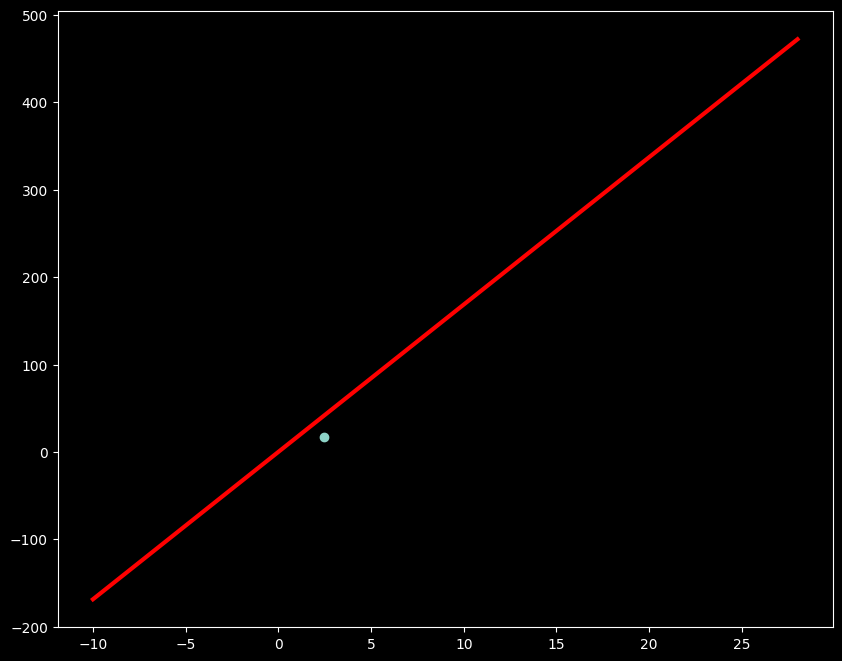

In [37]:
plt.scatter(w, b)
plt.plot(x, get_linear_curve(x, b),'r', lw=3)
